# MyAnimeList (MAL) Data Analysis

This notebook focuses on performing Exploratory Data Analysis (EDA) and Clustering on the MAL (MyAnimeList) dataset.

- EDA is done using Pandas, Numpy and Plotly.
- Clustering is done with the help of K-Means algorithm.

## Data

- The data used in this notebook is scraped from [MyAnimeList (MAL)](https://myanimelist.net/)
- The scraping is done using [`BeautifulSoup`](https://pypi.org/project/beautifulsoup4/#:~:text=Beautiful%20Soup%20is%20a%20library,and%20modifying%20the%20parse%20tree.) library of Python
- The data collects the information about anime for year 2023 and 2024(summer)
- You can find the code I used for scraping on my [Github Profile.](https://github.com/sg-sparsh-goyal)

### Data Dictionary

- `Title`: The name of the anime
- `Theme`: The theme of the anime
- `Studio`: The name of the studio that produced the anime
- `Source`: The source from which the anime has been adapted
- `Episodes`: The number of episodes in the anime
- `Rating`: The ratings of the anime
- `Members`: The number of members for an anime
- `Date`: The release date of the anime
- `Img_url`: The url of the anime poster


## Standard Imports

In [170]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = 'plotly_dark'
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from plotly.tools import FigureFactory as ff
from scipy import stats
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [171]:
df = pd.read_csv(r'anime_data_23-24.csv')
df.head()

Title  \
0                              Vinland Saga Season 2   
1                             Tomo-chan wa Onnanoko!   
2                  Tokyo Revengers: Seiya Kessen-hen   
3  Maou Gakuin no Futekigousha II: Shijou Saikyou...   
4  Otonari no Tenshi-sama ni Itsunomanika Dame Ni...   

                      Theme        Studio       Source Episodes  Rating  \
0          Gore, Historical         MAPPA        Manga   24 eps    8.81   
1                    School      Lay-duce    Web manga   13 eps    7.77   
2  Delinquents, Time Travel    LIDENFILMS        Manga   13 eps    7.65   
3     Reincarnation, School  SILVER LINK.  Light novel   12 eps    6.88   
4                    School  Project No.9  Light novel   12 eps    7.82   

  Members          Date                                            Img_url  
0    643K  Jan 10, 2023  https://cdn.myanimelist.net/images/anime/1170/...  
1    410K   Jan 5, 2023  https://cdn.myanimelist.net/images/anime/1444/...  
2    365K   Jan 8, 2023  https://cdn.myanimelist.net/images/anime/1773/...  
3    347K   Jan 8, 2023  https://cdn.myanimelist.net/images/anime/1369/...  
4    325K   Jan 7, 2023  https://cdn.myanimelist.net/images/anime/1240/...

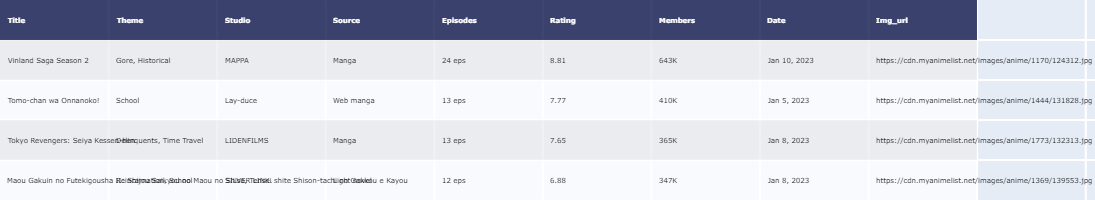

In [172]:
d=df.head(4)
table = ff.create_table(d)
table.update_layout(template='plotly')
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 7
iplot(table)

## Exploratory Data Analysis (EDA)

In [173]:
df.shape

(1684, 9)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1684 non-null   object 
 1   Theme     1684 non-null   object 
 2   Studio    1684 non-null   object 
 3   Source    1684 non-null   object 
 4   Episodes  1684 non-null   object 
 5   Rating    1043 non-null   float64
 6   Members   1684 non-null   object 
 7   Date      1684 non-null   object 
 8   Img_url   1684 non-null   object 
dtypes: float64(1), object(8)
memory usage: 118.5+ KB


In [175]:
df.describe()

Rating
count  1043.000000
mean      6.932982
std       0.806053
min       4.670000
25%       6.365000
50%       6.910000
75%       7.495000
max       9.340000

In [176]:
df.isnull().sum()

Title         0
Theme         0
Studio        0
Source        0
Episodes      0
Rating      641
Members       0
Date          0
Img_url       0
dtype: int64

In [177]:
df.replace({
    'Theme': 'Unknown',
    'Studio': 'Unknown',
    'Source': 'Unknown',
    'Episodes': '? eps',
    'Rating': 'N/A',
    'Date': 'Unknown',
}, np.nan, inplace=True)

In [178]:
df.isnull().sum()

Title         0
Theme       714
Studio      382
Source       37
Episodes    380
Rating      641
Members       0
Date         85
Img_url       0
dtype: int64

In [179]:
df.head()

Title  \
0                              Vinland Saga Season 2   
1                             Tomo-chan wa Onnanoko!   
2                  Tokyo Revengers: Seiya Kessen-hen   
3  Maou Gakuin no Futekigousha II: Shijou Saikyou...   
4  Otonari no Tenshi-sama ni Itsunomanika Dame Ni...   

                      Theme        Studio       Source Episodes  Rating  \
0          Gore, Historical         MAPPA        Manga   24 eps    8.81   
1                    School      Lay-duce    Web manga   13 eps    7.77   
2  Delinquents, Time Travel    LIDENFILMS        Manga   13 eps    7.65   
3     Reincarnation, School  SILVER LINK.  Light novel   12 eps    6.88   
4                    School  Project No.9  Light novel   12 eps    7.82   

  Members          Date                                            Img_url  
0    643K  Jan 10, 2023  https://cdn.myanimelist.net/images/anime/1170/...  
1    410K   Jan 5, 2023  https://cdn.myanimelist.net/images/anime/1444/...  
2    365K   Jan 8, 2023  https://cdn.myanimelist.net/images/anime/1773/...  
3    347K   Jan 8, 2023  https://cdn.myanimelist.net/images/anime/1369/...  
4    325K   Jan 7, 2023  https://cdn.myanimelist.net/images/anime/1240/...

Converting `Members` to numeric value and `Date` to date_time format

In [180]:
df['Members'] = df['Members'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y', errors='coerce')

In [181]:
df.head()

Title  \
0                              Vinland Saga Season 2   
1                             Tomo-chan wa Onnanoko!   
2                  Tokyo Revengers: Seiya Kessen-hen   
3  Maou Gakuin no Futekigousha II: Shijou Saikyou...   
4  Otonari no Tenshi-sama ni Itsunomanika Dame Ni...   

                      Theme        Studio       Source Episodes  Rating  \
0          Gore, Historical         MAPPA        Manga   24 eps    8.81   
1                    School      Lay-duce    Web manga   13 eps    7.77   
2  Delinquents, Time Travel    LIDENFILMS        Manga   13 eps    7.65   
3     Reincarnation, School  SILVER LINK.  Light novel   12 eps    6.88   
4                    School  Project No.9  Light novel   12 eps    7.82   

    Members       Date                                            Img_url  
0  643000.0 2023-01-10  https://cdn.myanimelist.net/images/anime/1170/...  
1  410000.0 2023-01-05  https://cdn.myanimelist.net/images/anime/1444/...  
2  365000.0 2023-01-08  https://cdn.myanimelist.net/images/anime/1773/...  
3  347000.0 2023-01-08  https://cdn.myanimelist.net/images/anime/1369/...  
4  325000.0 2023-01-07  https://cdn.myanimelist.net/images/anime/1240/...

Converting `Episodes` to numeric value

In [182]:
df['Episodes'] = df['Episodes'].str.replace(r' eps?| ep', '', regex=True).astype(float)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     1684 non-null   object        
 1   Theme     970 non-null    object        
 2   Studio    1302 non-null   object        
 3   Source    1647 non-null   object        
 4   Episodes  1304 non-null   float64       
 5   Rating    1043 non-null   float64       
 6   Members   1684 non-null   float64       
 7   Date      1599 non-null   datetime64[ns]
 8   Img_url   1684 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 118.5+ KB


### Overall Statistics

In [184]:
Title = df["Title"].unique()
Studio = df["Studio"].unique()
Theme = df['Theme'].unique()
Source = df["Source"].unique()

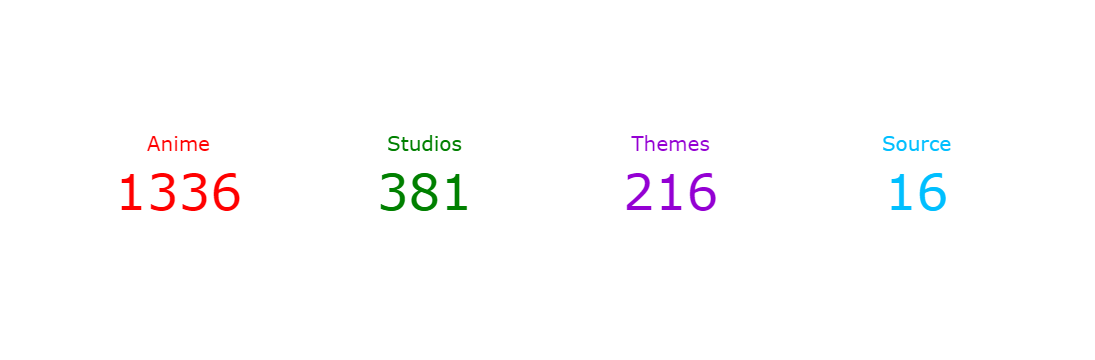

In [185]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(Title),
    title = {"text": "Anime","font": {"color": "red","size":20}},
    number={"font":{"color": "red","size":50}},
    domain = {"row": 0, "column": 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(Studio),
    title = {"text": "Studios","font": {"color": "green","size":20}},
    number={"font":{"color": "green","size":50}},
    domain = {"row": 0, "column": 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(Theme),
    title = {"text": "Themes","font": {"color": "darkviolet","size":20}},
    number={"font":{"color": "darkviolet","size":50}},
    domain = {"row": 0, "column": 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(Source),
    title = {"text": "Source","font": {"color": "deepskyblue","size":20}},
    number={"font":{"color": "deepskyblue","size":50}},
    domain = {"row": 0, "column": 3}
))

fig.update_layout(
    grid = {"rows": 1, "columns": 4, "pattern": "independent"},
template = 'plotly_white')
fig.show()

## Handling Missing Values

In [186]:
df.isnull().sum()

Title         0
Theme       714
Studio      382
Source       37
Episodes    380
Rating      641
Members       0
Date         85
Img_url       0
dtype: int64

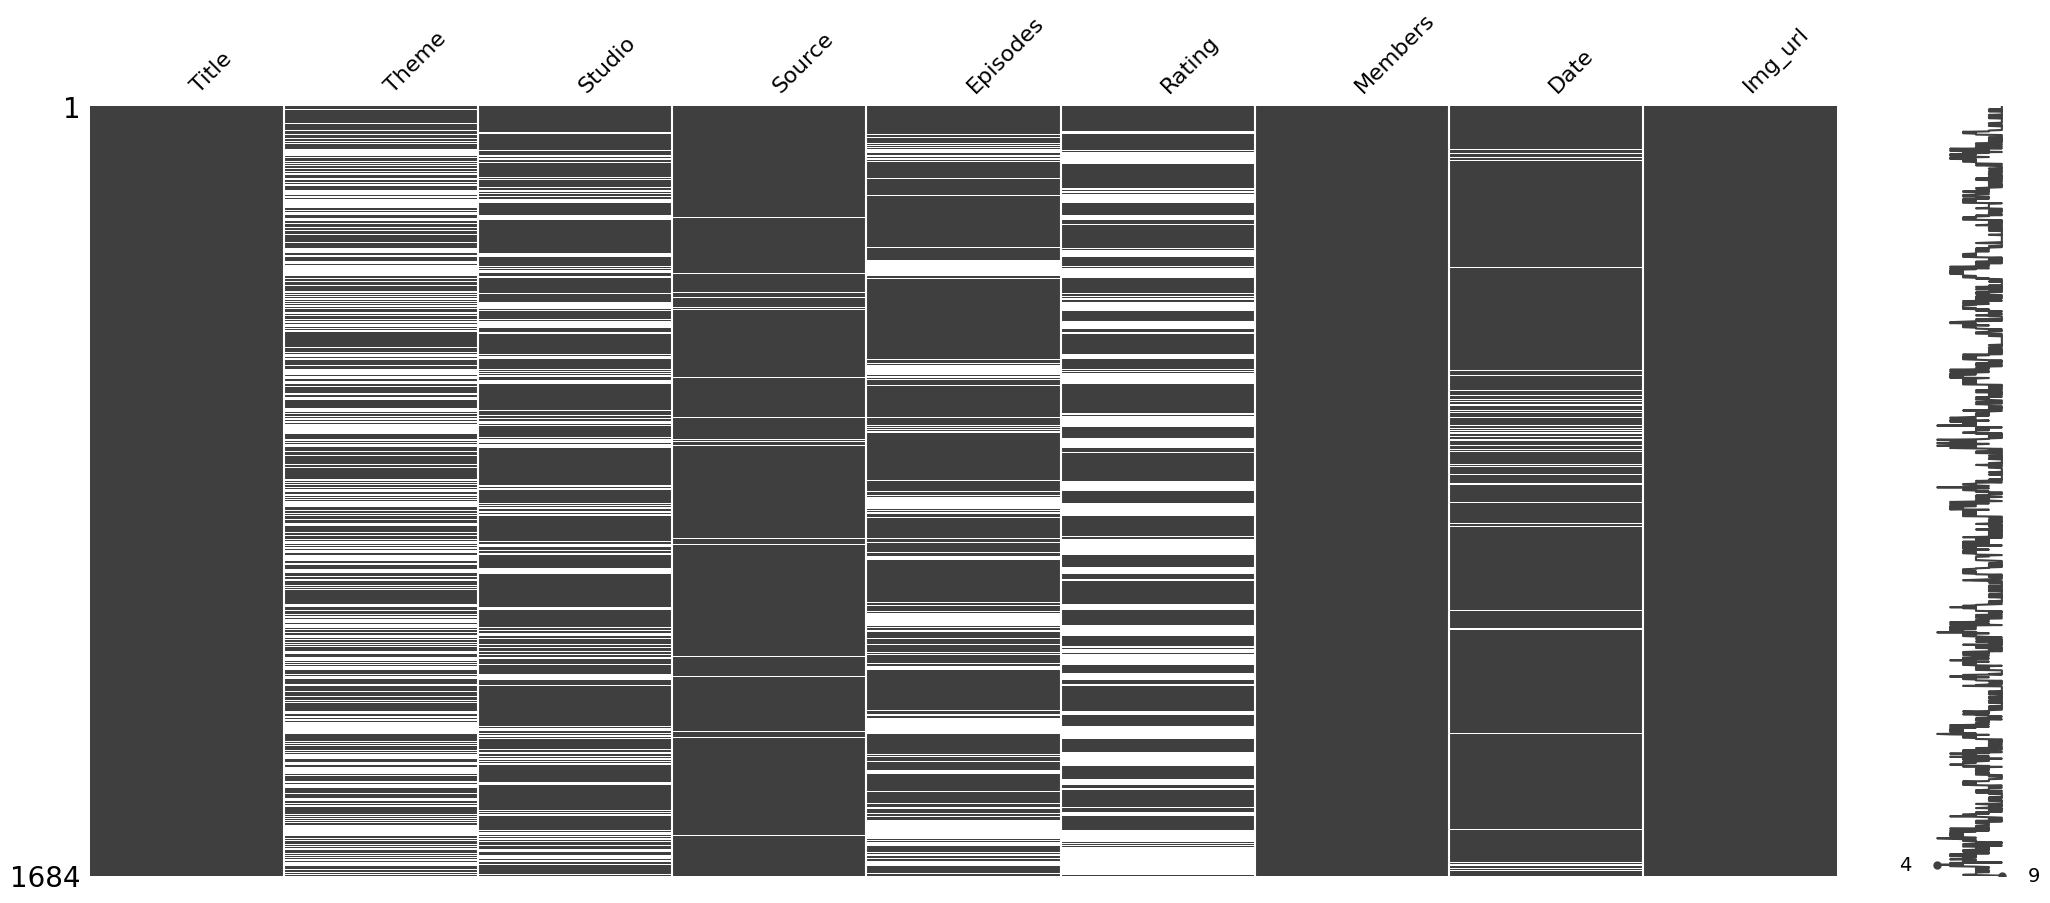

In [187]:
msno.matrix(df);

Filling missing values in Categorical columns with 'Unknown'

In [188]:
df['Theme'] = df['Theme'].fillna('Unknown')
df['Studio'] = df['Studio'].fillna('Unknown')
df['Source'] = df['Source'].fillna('Unknown')

Filling missing values in `Episodes` with the median value

In [189]:
median_episodes = df['Episodes'].median()
df['Episodes'].fillna(median_episodes, inplace=True)

Filling missing values in `Rating` with mean value

In [190]:
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

Dropping the rows with missing values in `Date`

In [191]:
df = df.dropna(subset=['Date'])

In [192]:
df.isnull().sum()

Title       0
Theme       0
Studio      0
Source      0
Episodes    0
Rating      0
Members     0
Date        0
Img_url     0
dtype: int64

In [193]:
df.shape

(1599, 9)

### Visualizing Outliers

In [194]:
numerical_columns = ['Episodes', 'Rating', 'Members']

for clm in numerical_columns:
    Q1 = df[clm].quantile(0.25)
    Q3 = df[clm].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[clm] < lower) | (df[clm] > upper)]
    print(f"Number of outliers in {clm}: {outliers.shape[0]}")

Number of outliers in Episodes: 159
Number of outliers in Rating: 280
Number of outliers in Members: 267


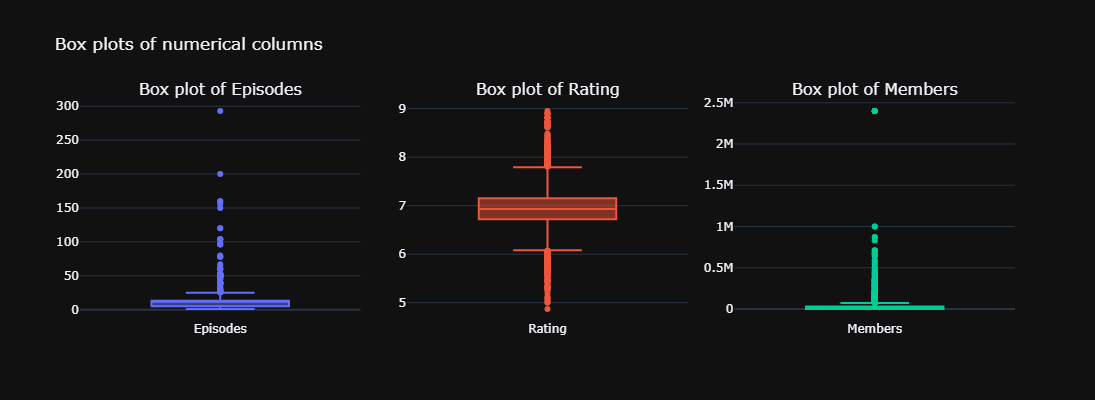

In [195]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=[f'Box plot of {col}' for col in numerical_columns],
    vertical_spacing=0.1,
    horizontal_spacing=0.05
)

# Add box plots to each subplot
for i, column in enumerate(numerical_columns):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(go.Box(y=df[column], name=column), row=row, col=col)

fig.update_layout(
    height=400,
    width=900,  
    title_text="Box plots of numerical columns",
    showlegend=False,
    template = 'plotly_dark'
)

fig.show()


## Data Visualization

Creating a Seperate dataframe without Unknown values for better Visulaization of Data

In [196]:
filtered_df = df[
    (df['Theme'] != 'Unknown') &
    (df['Studio'] != 'Unknown') &
    (df['Source'] != 'Unknown')
]
filtered_df.shape

(739, 9)

In [197]:
filtered_df.head()

Title  \
0                              Vinland Saga Season 2   
1                             Tomo-chan wa Onnanoko!   
2                  Tokyo Revengers: Seiya Kessen-hen   
3  Maou Gakuin no Futekigousha II: Shijou Saikyou...   
4  Otonari no Tenshi-sama ni Itsunomanika Dame Ni...   

                      Theme        Studio       Source  Episodes  Rating  \
0          Gore, Historical         MAPPA        Manga      24.0    8.81   
1                    School      Lay-duce    Web manga      13.0    7.77   
2  Delinquents, Time Travel    LIDENFILMS        Manga      13.0    7.65   
3     Reincarnation, School  SILVER LINK.  Light novel      12.0    6.88   
4                    School  Project No.9  Light novel      12.0    7.82   

    Members       Date                                            Img_url  
0  643000.0 2023-01-10  https://cdn.myanimelist.net/images/anime/1170/...  
1  410000.0 2023-01-05  https://cdn.myanimelist.net/images/anime/1444/...  
2  365000.0 2023-01-08  https://cdn.myanimelist.net/images/anime/1773/...  
3  347000.0 2023-01-08  https://cdn.myanimelist.net/images/anime/1369/...  
4  325000.0 2023-01-07  https://cdn.myanimelist.net/images/anime/1240/...

### Distribution of Ratings

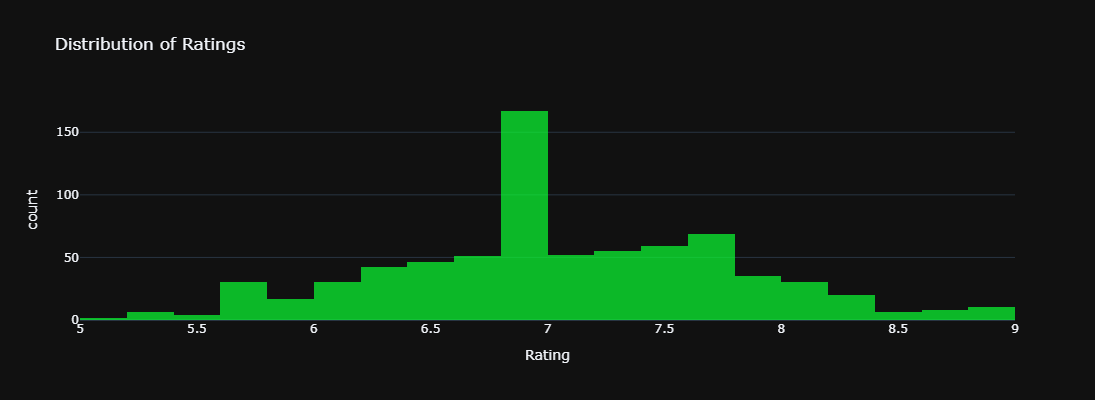

In [198]:
fig = px.histogram(filtered_df, x='Rating', nbins=20, title='Distribution of Ratings')
fig.update_traces(marker_color='rgba(10,255,50,0.7)')
fig.update_layout(height=400)
fig.show()

### Distribution of Sources

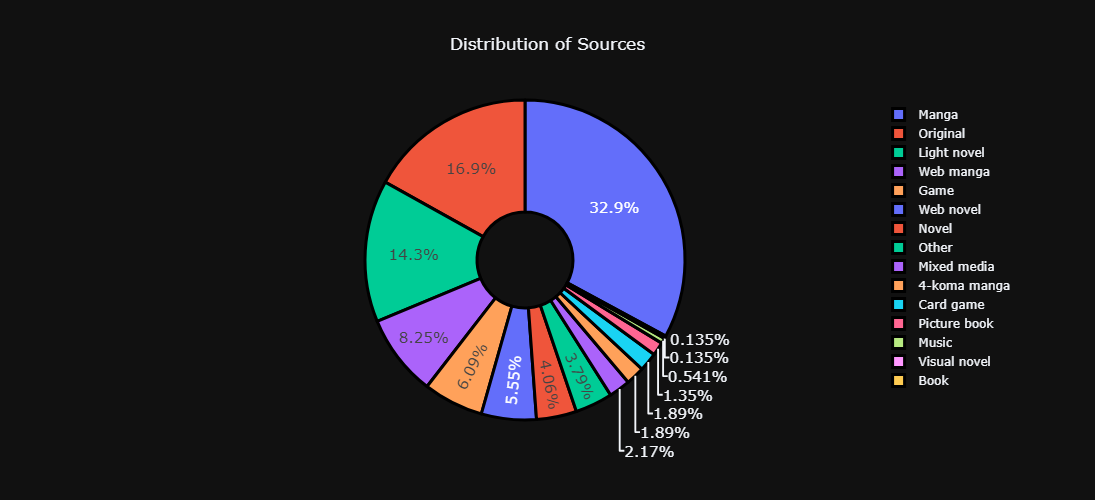

In [199]:
source_counts = filtered_df['Source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Count']

fig_source = go.Figure(data=[go.Pie(labels=source_counts['Source'],
                                   values=source_counts['Count'],
                                   hole=0.3,
                                   marker_colors=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A'])])

fig_source.update_traces(textfont_size=15,
                         marker=dict(line=dict(color='#000000', width=3)))

fig_source.update_layout(title='Distribution of Sources',
                         title_x=0.5,
                         showlegend=True)
fig_source.update_layout(height=500)

fig_source.show()

### Frequency of Sources

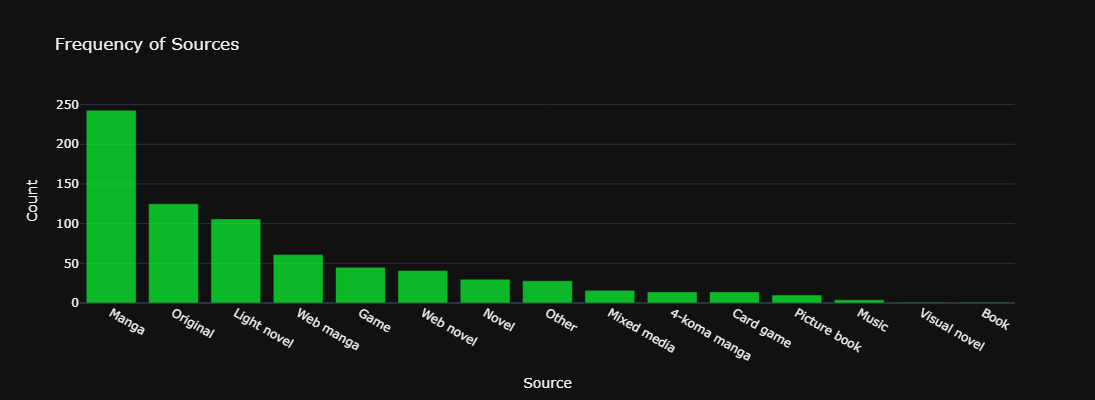

In [200]:
source_counts = filtered_df['Source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Count']

fig = px.bar(source_counts, x='Source', y='Count', title='Frequency of Sources')
fig.update_traces(marker_color='rgba(10,255,50,0.7)')
fig.update_layout(height=400)

fig.show()

### Members Distribution

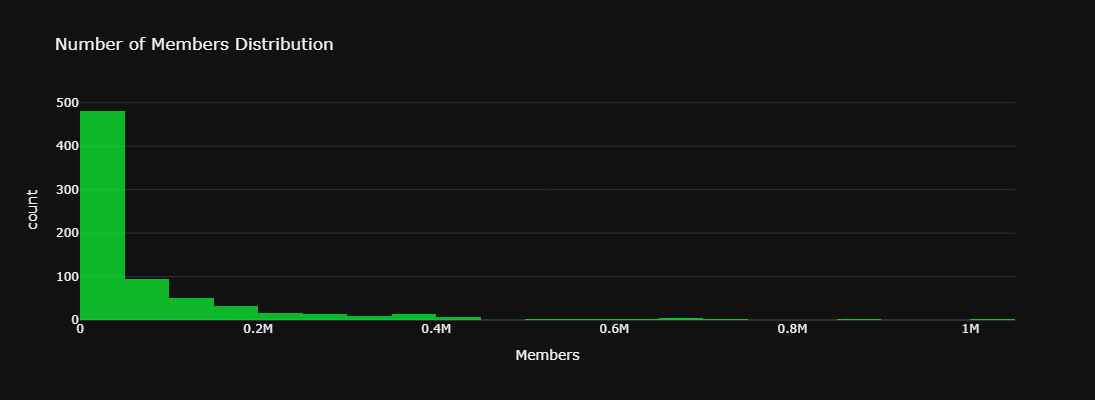

In [201]:
fig = px.histogram(filtered_df, x='Members', nbins=20, title='Number of Members Distribution')
fig.update_traces(marker_color='rgba(10,255,50,0.7)')
fig.update_layout(height=400)

fig.show()

### Rating Vs. Episodes

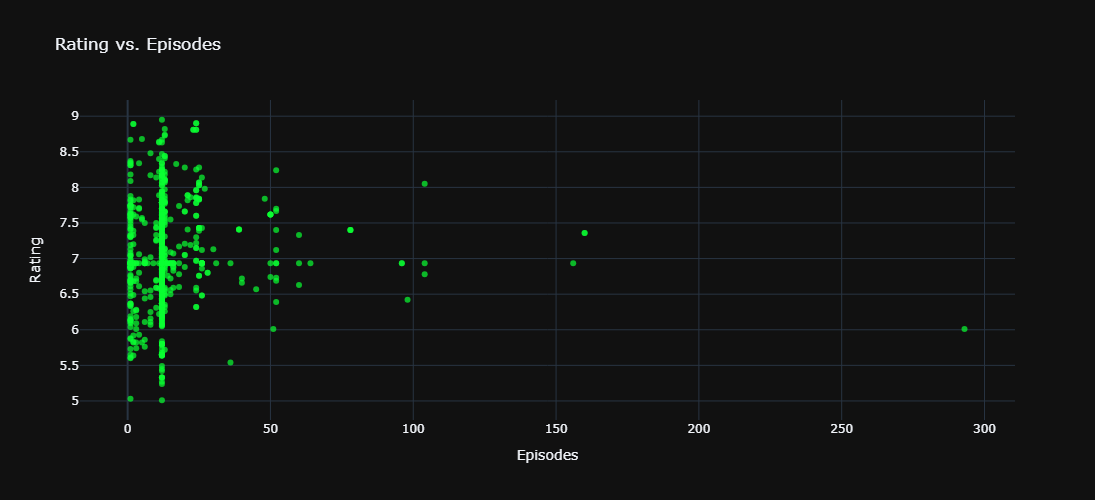

In [202]:
fig = px.scatter(filtered_df, x='Episodes', y='Rating', title='Rating vs. Episodes')
fig.update_traces(marker_color='rgba(10,255,50,0.7)')
fig.update_layout(height=500)

fig.show()

### Rating by Studio and Theme

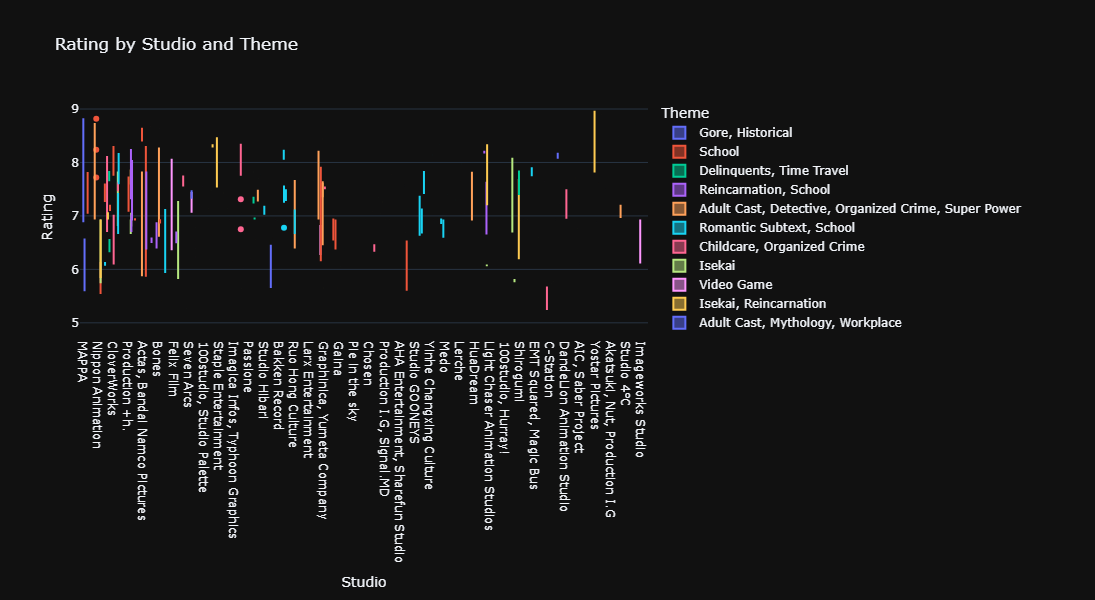

In [203]:
fig = px.box(filtered_df, x='Studio', y='Rating', color='Theme', title='Rating by Studio and Theme')
fig.update_layout(height=600)

fig.show()

### Correlation Heatmap between Episodes, Rating & Members

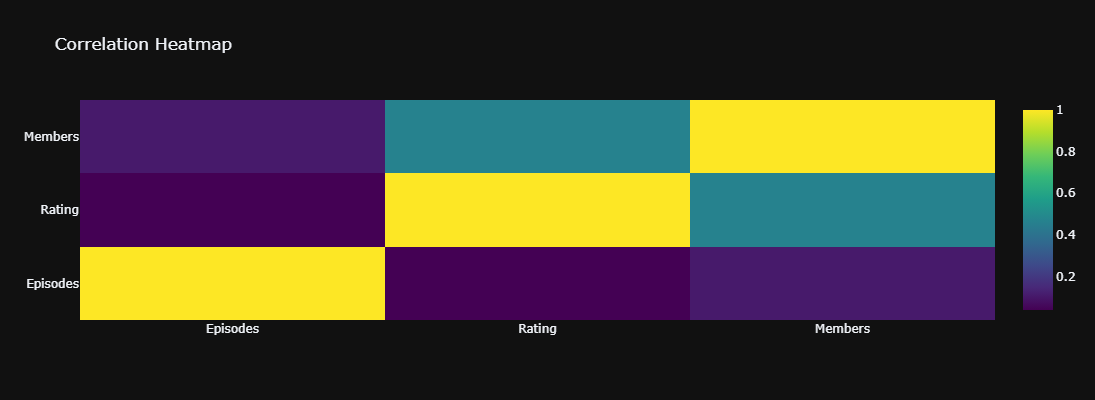

In [204]:
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

corr = filtered_df[['Episodes', 'Rating', 'Members']].corr()
fig = go.Figure(data=go.Heatmap(z=corr.values,
                               x=corr.columns,
                               y=corr.columns,
                               colorscale='Viridis'))
fig.update_layout(title='Correlation Heatmap')
fig.update_layout(height=400)

fig.show()

### Top 10 anime by rating

In [205]:
top_10_anime_by_rating = filtered_df.sort_values(by='Rating',ascending=False).head(10)
top_10_anime_by_rating

Title  \
1610            Monogatari Series: Off & Monster Season   
760                              Kusuriya no Hitorigoto   
1104                             Kusuriya no Hitorigoto   
249   Shingeki no Kyojin: The Final Season - Kankets...   
1024  Shingeki no Kyojin: The Final Season - Kankets...   
1045           Boku no Kokoro no Yabai Yatsu 2nd Season   
0                                 Vinland Saga Season 2   
844                           Jujutsu Kaisen 2nd Season   
498                           Jujutsu Kaisen 2nd Season   
331                               Vinland Saga Season 2   

                         Theme                      Studio       Source  \
1610                   Vampire                       Shaft  Light novel   
760        Historical, Medical  OLM, TOHO animation STUDIO  Light novel   
1104       Historical, Medical  OLM, TOHO animation STUDIO  Light novel   
249   Gore, Military, Survival                       MAPPA        Manga   
1024  Gore, Military, Survival                       MAPPA        Manga   
1045                    School           Shin-Ei Animation        Manga   
0             Gore, Historical                       MAPPA        Manga   
844               Gore, School                       MAPPA        Manga   
498               Gore, School                       MAPPA        Manga   
331           Gore, Historical                       MAPPA        Manga   

      Episodes  Rating    Members       Date  \
1610      12.0    8.95    56000.0 2024-07-06   
760       24.0    8.90   447000.0 2023-10-22   
1104      24.0    8.90   447000.0 2023-10-22   
249        2.0    8.89   677000.0 2023-03-04   
1024       2.0    8.89   677000.0 2023-03-04   
1045      13.0    8.82   198000.0 2024-01-07   
0         24.0    8.81   643000.0 2023-01-10   
844       23.0    8.81  1000000.0 2023-07-06   
498       23.0    8.81  1000000.0 2023-07-06   
331       24.0    8.81   643000.0 2023-01-10   

                                                Img_url  
1610  https://cdn.myanimelist.net/images/anime/1741/...  
760   https://cdn.myanimelist.net/images/anime/1708/...  
1104  https://cdn.myanimelist.net/images/anime/1708/...  
249   https://cdn.myanimelist.net/images/anime/1279/...  
1024  https://cdn.myanimelist.net/images/anime/1279/...  
1045  https://cdn.myanimelist.net/images/anime/1643/...  
0     https://cdn.myanimelist.net/images/anime/1170/...  
844   https://cdn.myanimelist.net/images/anime/1792/...  
498   https://cdn.myanimelist.net/images/anime/1792/...  
331   https://cdn.myanimelist.net/images/anime/1170/...

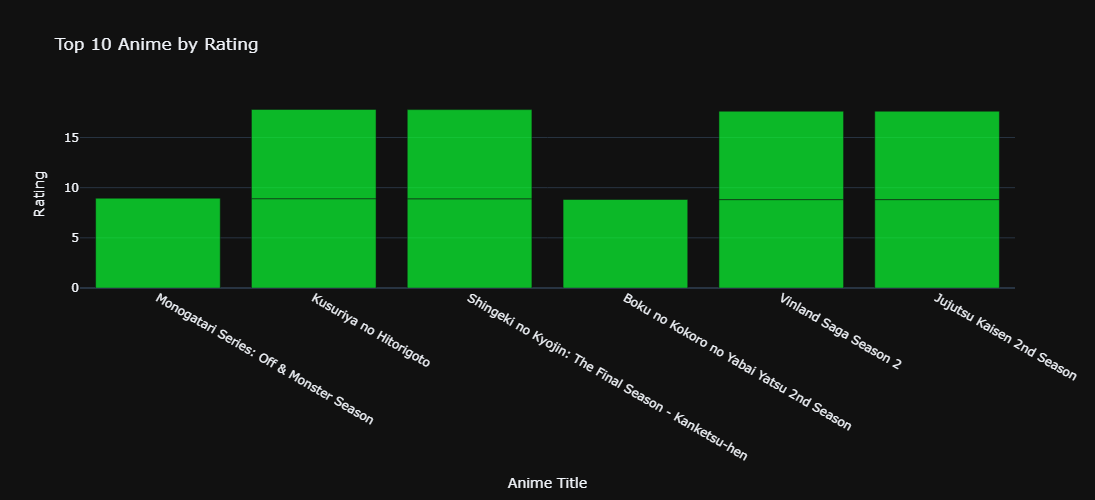

In [206]:
fig = px.bar(top_10_anime_by_rating, x='Title', y='Rating', 
             title='Top 10 Anime by Rating', 
             labels={'Title': 'Anime Title', 'Rating': 'Rating'},
             color_discrete_sequence=['rgba(10,255,50,0.7)'])
fig.update_layout(height=500)

fig.show()

### Which studios produced the highest-rated anime?

In [207]:
studio_ratings = filtered_df.groupby('Studio')['Rating'].mean().reset_index()
top_studios_by_rating = studio_ratings.sort_values(by='Rating', ascending=False).head(10)
top_studios_by_rating

Studio    Rating
140          OLM, TOHO animation STUDIO  8.900000
154            Pierrot, Studio Signpost  8.730000
105                          LAN Studio  8.630000
212                           Studio M2  8.480000
179                               Shaft  8.390000
174            Samsara Animation Studio  8.340000
133                               Nexus  8.310000
260                            ufotable  8.195000
7    AHA Entertainment, Sharefun Studio  8.140000
167               Red Dog Culture House  8.136667

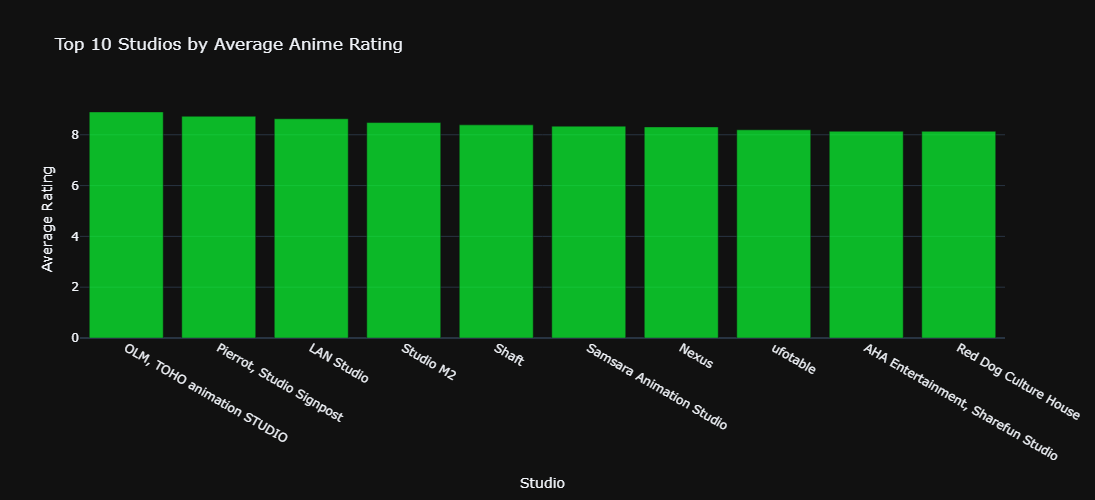

In [208]:
fig = px.bar(top_studios_by_rating, x='Studio', y='Rating', 
             title='Top 10 Studios by Average Anime Rating', 
             labels={'Studio': 'Studio', 'Rating': 'Average Rating'},
             color_discrete_sequence=['rgba(10,255,50,0.7)'])
fig.update_layout(height=500)

# Display the plot
fig.show()

### What are the top 10 anime by the number of members?


In [209]:
top_10_anime_by_members = filtered_df.sort_values(by='Members', ascending=False).head(10)
top_10_anime_by_members

Title  \
498                           Jujutsu Kaisen 2nd Season   
844                           Jujutsu Kaisen 2nd Season   
63                      Boruto: Naruto Next Generations   
261            Kimetsu no Yaiba: Katanakaji no Sato-hen   
262                                        "Oshi no Ko"   
1038                           Ore dake Level Up na Ken   
64                                            Blue Lock   
263                                          Jigokuraku   
249   Shingeki no Kyojin: The Final Season - Kankets...   
1024  Shingeki no Kyojin: The Final Season - Kankets...   

                          Theme        Studio     Source  Episodes  Rating  \
498                Gore, School         MAPPA      Manga      23.0    8.81   
844                Gore, School         MAPPA      Manga      23.0    8.81   
63                 Martial Arts       Pierrot      Manga     293.0    6.01   
261                  Historical      ufotable      Manga      11.0    8.22   
262      Reincarnation, Showbiz     Doga Kobo      Manga      11.0    8.63   
1038                 Adult Cast  A-1 Pictures  Web manga      12.0    8.29   
64                  Team Sports          8bit      Manga      24.0    8.25   
263   Gore, Historical, Samurai         MAPPA      Manga      13.0    8.10   
249    Gore, Military, Survival         MAPPA      Manga       2.0    8.89   
1024   Gore, Military, Survival         MAPPA      Manga       2.0    8.89   

        Members       Date                                            Img_url  
498   1000000.0 2023-07-06  https://cdn.myanimelist.net/images/anime/1792/...  
844   1000000.0 2023-07-06  https://cdn.myanimelist.net/images/anime/1792/...  
63     874000.0 2017-04-05  https://cdn.myanimelist.net/images/anime/1091/...  
261    870000.0 2023-04-09  https://cdn.myanimelist.net/images/anime/1765/...  
262    830000.0 2023-04-12  https://cdn.myanimelist.net/images/anime/1812/...  
1038   713000.0 2024-01-07  https://cdn.myanimelist.net/images/anime/1801/...  
64     710000.0 2022-10-09  https://cdn.myanimelist.net/images/anime/1258/...  
263    710000.0 2023-04-01  https://cdn.myanimelist.net/images/anime/1075/...  
249    677000.0 2023-03-04  https://cdn.myanimelist.net/images/anime/1279/...  
1024   677000.0 2023-03-04  https://cdn.myanimelist.net/images/anime/1279/...

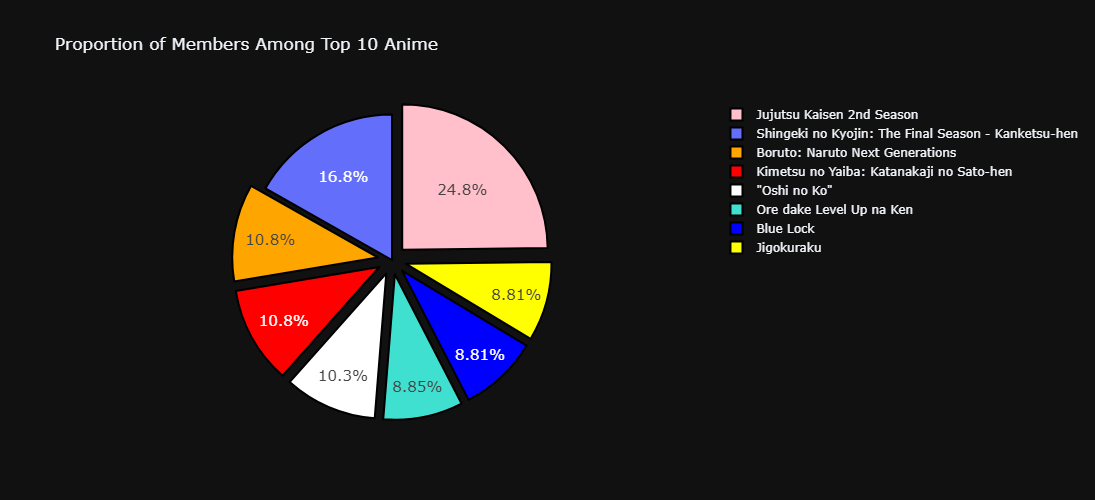

In [210]:
colors = ["pink", "green", "orange", "red", "white", "turquoise", "blue", "yellow"]

fig = px.pie(top_10_anime_by_members, values='Members', names='Title',
             title='Proportion of Members Among Top 10 Anime')
pull_values = [0.1, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0]

fig.update_traces(pull=pull_values, textfont_size=15,
                 marker=dict(colors=colors,line=dict(color='#000000', width=2)))
fig.update_layout(height=500)

fig.show()

### Is there a correlation between the number of members and the rating?

Pearson correlation coefficient between number of members and rating: 0.46686895143512963



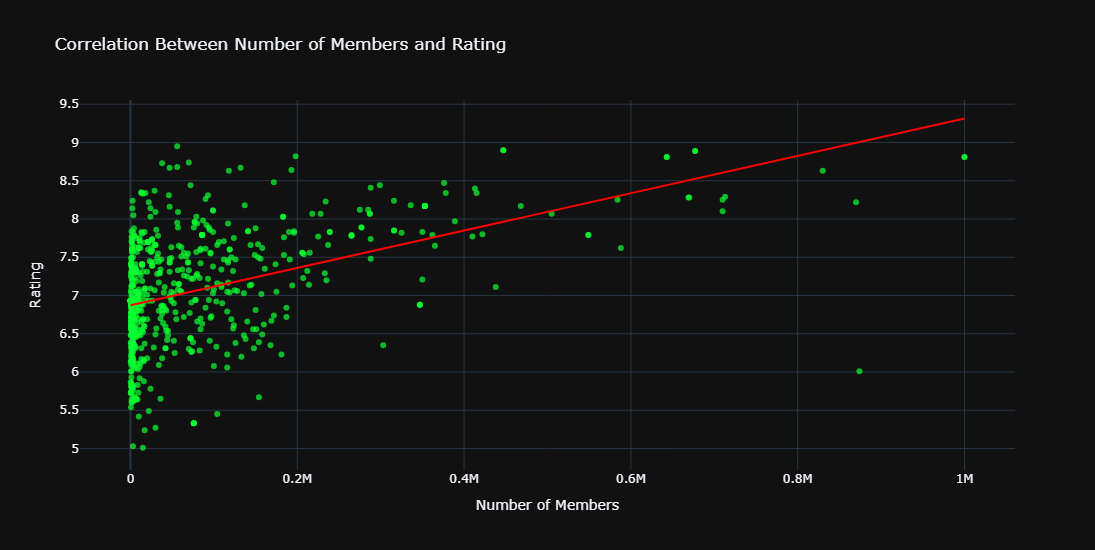

In [211]:
correlation = filtered_df['Members'].corr(filtered_df['Rating'])
print(f"Pearson correlation coefficient between number of members and rating: {correlation}")
print()

fig = px.scatter(filtered_df, x='Members', y='Rating', 
                 title='Correlation Between Number of Members and Rating',
                 labels={'Members': 'Number of Members', 'Rating': 'Rating'},
                 trendline='ols', trendline_color_override='red')
fig.update_traces(marker_color='rgba(10,255,50,0.7)')
fig.update_layout(height=550)


fig.show()

### What are the most common themes among the anime?

In [212]:
theme_counts = filtered_df['Theme'].head(10).value_counts().reset_index()
theme_counts.columns = ['Theme', 'Count']
theme_counts

Theme  Count
0                                             School      2
1                                   Gore, Historical      1
2                           Delinquents, Time Travel      1
3                              Reincarnation, School      1
4  Adult Cast, Detective, Organized Crime, Super ...      1
5                           Romantic Subtext, School      1
6                         Childcare, Organized Crime      1
7                                             Isekai      1
8                                         Video Game      1

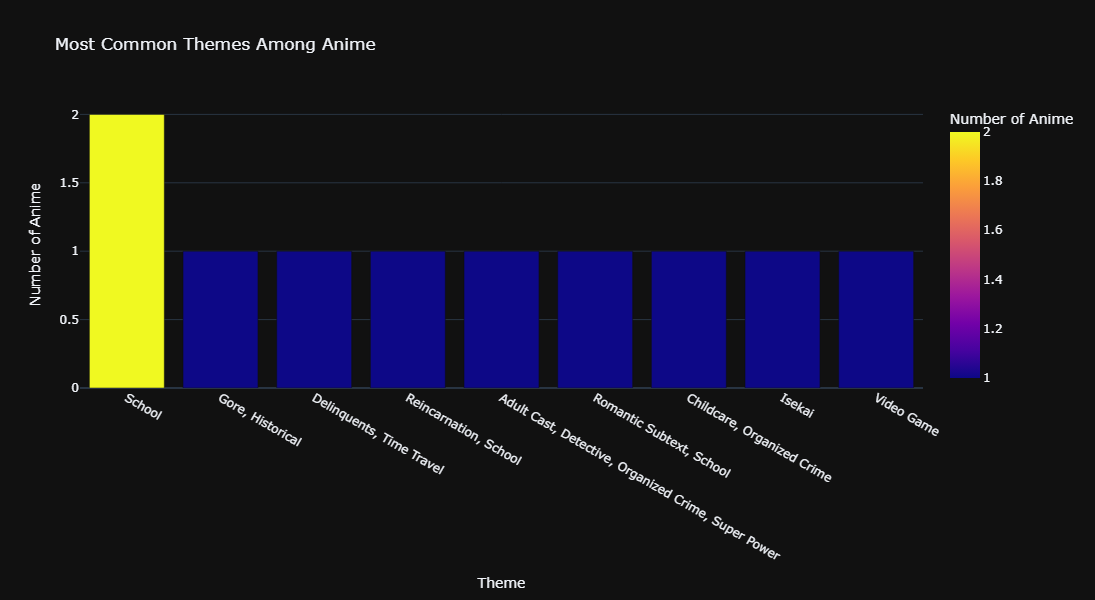

In [213]:
fig = px.bar(theme_counts, x='Theme', y='Count',
             title='Most Common Themes Among Anime',
             labels={'Theme': 'Theme', 'Count': 'Number of Anime'},
             color='Count')

fig.update_layout(height=600,
    xaxis_title='Theme',
    yaxis_title='Number of Anime')
fig.show()

### Most Common Sources

In [214]:
source_counts = filtered_df['Source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Count']

print(source_counts)

          Source  Count
0          Manga    243
1       Original    125
2    Light novel    106
3      Web manga     61
4           Game     45
5      Web novel     41
6          Novel     30
7          Other     28
8    Mixed media     16
9   4-koma manga     14
10     Card game     14
11  Picture book     10
12         Music      4
13  Visual novel      1
14          Book      1


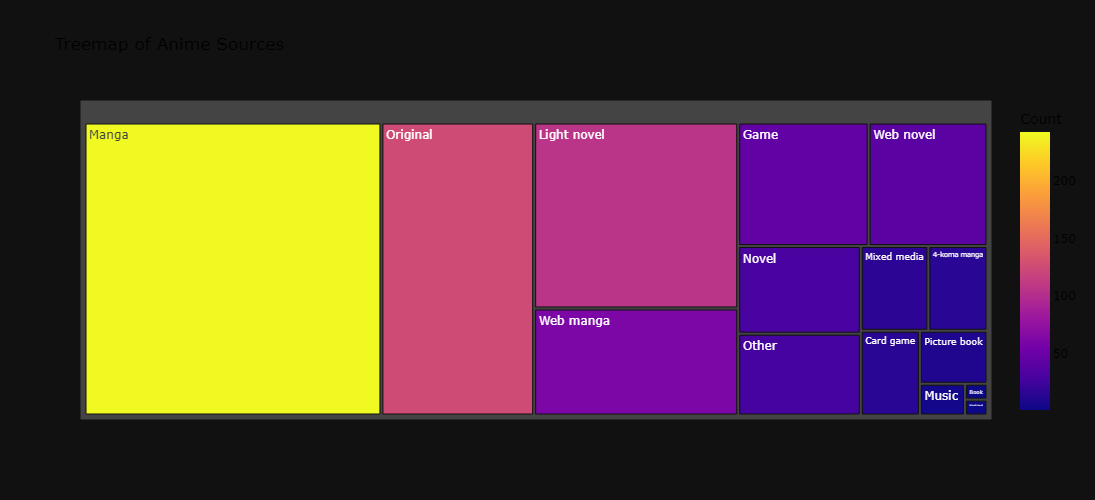

In [215]:
fig = px.treemap(source_counts, path=['Source'], values='Count',
                 title='Treemap of Anime Sources',
                 color='Count')

fig.update_layout(
    height=500,
    font=dict(size=12, color='black') 
)

fig.show()

### Average Rating by Source of Anime

In [216]:
average_rating_by_source = filtered_df.groupby('Source')['Rating'].mean().reset_index()
average_rating_by_source.columns = ['Source', 'Average Rating']

average_rating_by_source = average_rating_by_source.sort_values(by='Average Rating', ascending=False)

print(average_rating_by_source)

          Source  Average Rating
1           Book        7.580000
5          Manga        7.363172
8          Novel        7.306164
13     Web manga        7.144423
14     Web novel        7.139923
4    Light novel        7.023141
9       Original        6.901834
6    Mixed media        6.867686
11  Picture book        6.852684
0   4-koma manga        6.602857
10         Other        6.512706
7          Music        6.478245
3           Game        6.475376
2      Card game        6.172569
12  Visual novel        5.920000


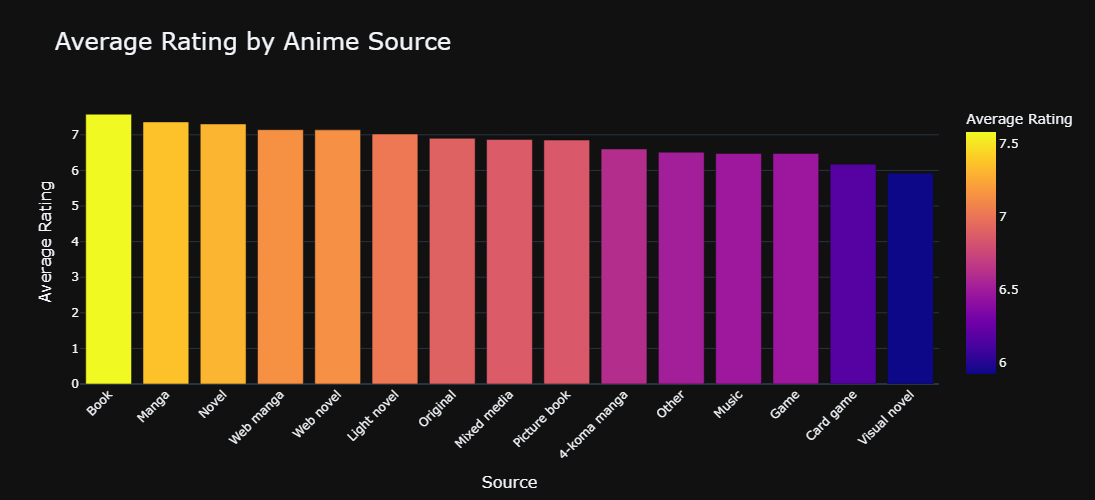

In [217]:
fig = px.bar(average_rating_by_source, x='Source', y='Average Rating',
             title='Average Rating by Anime Source',
             labels={'Source': 'Source', 'Average Rating': 'Average Rating'},
             color='Average Rating')

fig.update_layout(
    height=500, 
    xaxis_title='Source',
    yaxis_title='Average Rating',
    title_font_size=24,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis_tickangle=-45
)

fig.show()

### Number of Anime as per release year

In [218]:
filtered_df['Year'] = filtered_df['Date'].dt.year
anime_per_year = filtered_df.groupby('Year').size().reset_index(name='Count')
anime_per_year

Year  Count
0   1992      7
1   1995      7
2   1996      7
3   2005      7
4   2016      7
5   2017      1
6   2018     12
7   2020      1
8   2021      2
9   2022     26
10  2023    422
11  2024    240

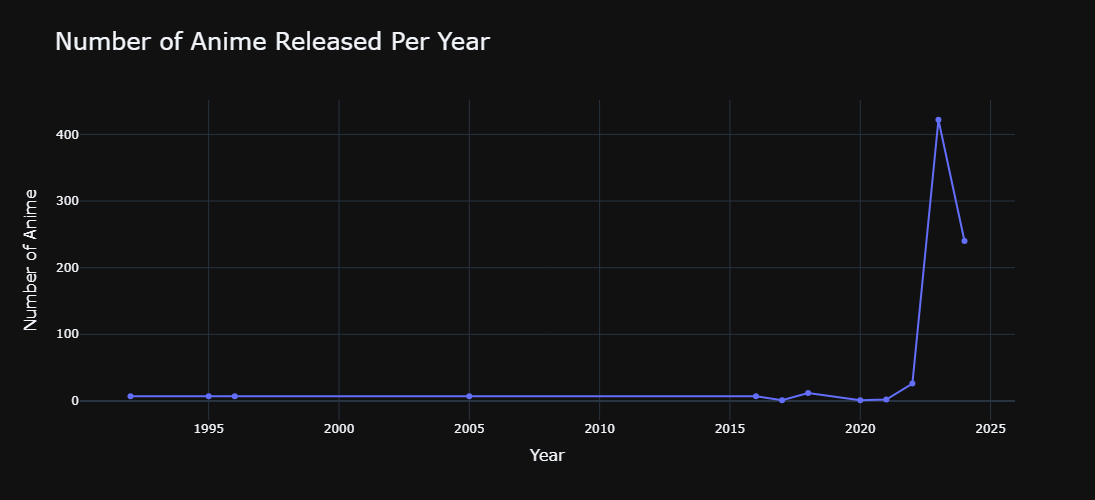

In [219]:
fig = px.line(anime_per_year, x='Year', y='Count',
              title='Number of Anime Released Per Year',
              labels={'Year': 'Year', 'Count': 'Number of Anime'},
              markers=True)

fig.update_layout(
    height=500, 
    xaxis_title='Year',
    yaxis_title='Number of Anime',
    title_font_size=24,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16

)

fig.show()

### Average Rating per year

In [220]:
average_rating_per_year = filtered_df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']
print(average_rating_per_year)

    Year  Average Rating
0   1992        7.790000
1   1995        7.310000
2   1996        8.170000
3   2005        7.700000
4   2016        6.370000
5   2017        6.010000
6   2018        5.737748
7   2020        7.260000
8   2021        6.676491
9   2022        6.880499
10  2023        7.075294
11  2024        7.054450


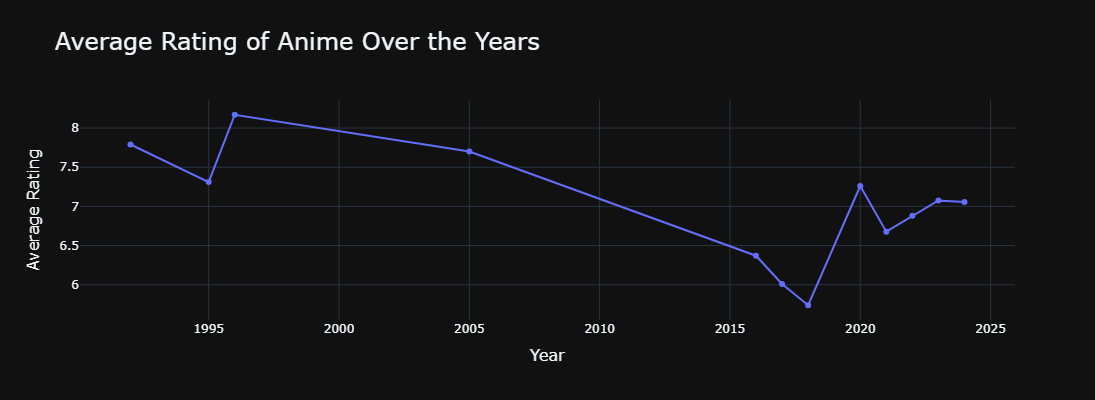

In [221]:
fig = px.line(average_rating_per_year, x='Year', y='Average Rating',
              title='Average Rating of Anime Over the Years',
              labels={'Year': 'Year', 'Average Rating': 'Average Rating'},
              markers=True)

fig.update_layout(
    height=400, 
    xaxis_title='Year',
    yaxis_title='Average Rating',
    title_font_size=24,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16

)

fig.show()

Animated bar chart for the above line chart

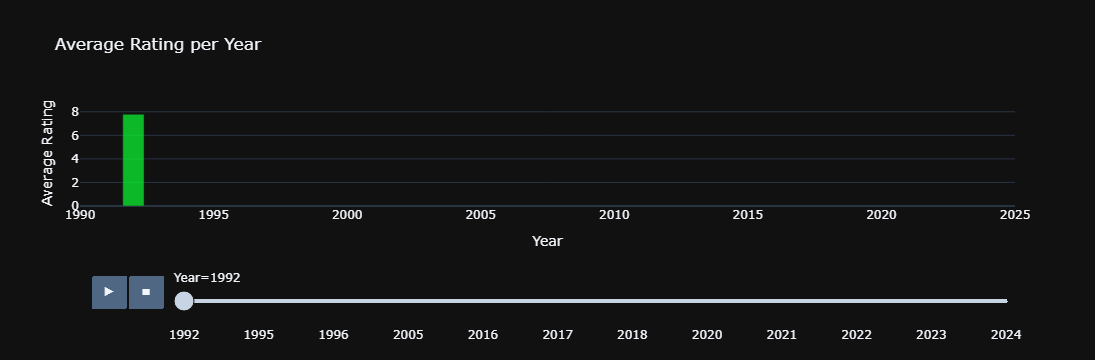

In [222]:
data = {
    'Year': [1992, 1995, 1996, 2005, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024],
    'Average Rating': [7.790000, 7.310000, 8.170000, 7.700000, 6.370000, 6.010000, 5.737748, 7.260000, 6.676491, 6.880499, 7.075294, 7.054450]
}
average_rating_per_year = pd.DataFrame(data)

fig = px.bar(
    average_rating_per_year,
    x='Year',
    y='Average Rating',
    title='Average Rating per Year',
    animation_frame='Year',
    range_x=[1990, 2025],
    range_y=[0, 9],
    template='plotly_dark',
    color_discrete_sequence=['rgba(10,255,50,0.7)']
    
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Rating',
    showlegend=False
)

fig.show()


### Viewing Random Anime Poster Images

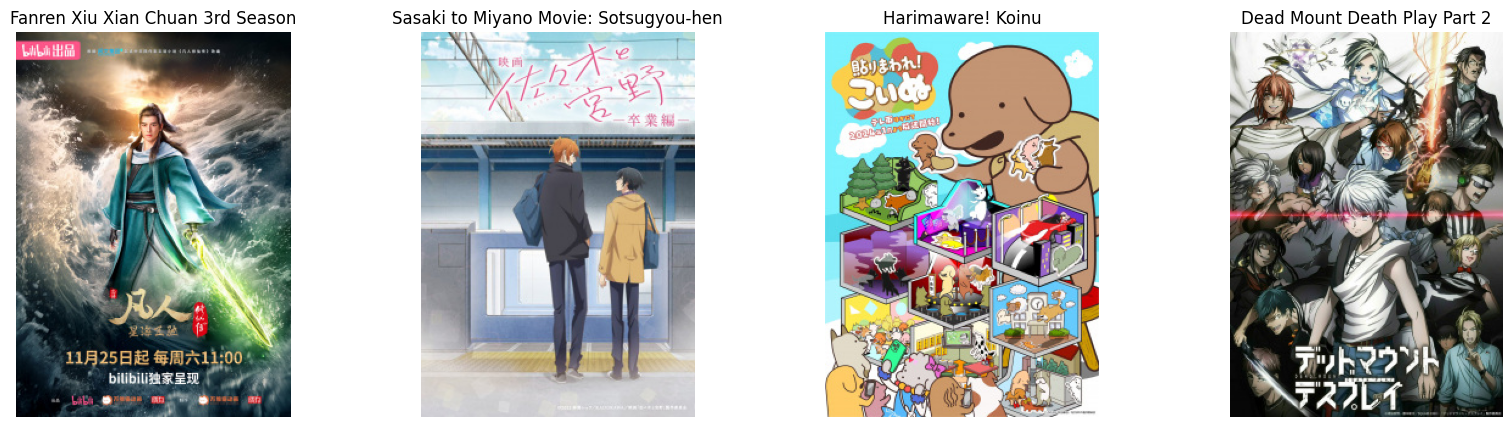

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import random

sampled_df = df.sample(n=4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, (title, url) in zip(axes, zip(sampled_df['Title'], sampled_df['Img_url'])):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)
    ax.set_title(title)  
    ax.axis('off')

plt.show()


### Word Cloud

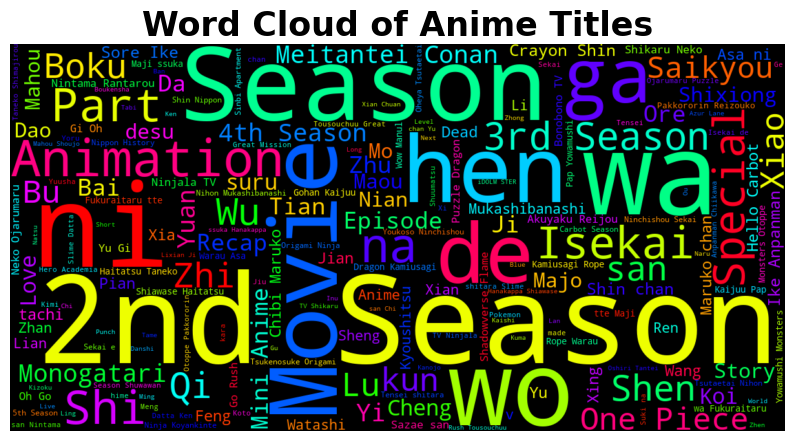

In [224]:
text = ' '.join(title for title in df['Title'])

wordcloud = WordCloud(
    width=1200, 
    height=600, 
    background_color='black',  
    colormap='hsv', 
    max_words=200, 
    contour_color='white', 
    contour_width=2, 
    relative_scaling=0.5,  
    random_state=21  
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Anime Titles', fontsize=24, fontweight='bold') 
plt.show()

## Clustering Anime Titles

In [225]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Basic Preprocessing

Removing Outliers

In [226]:
# Missing values already handled during the preprocesing done at starting

num_features = ['Episodes', 'Rating', 'Members']

def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

df_cleaned = remove_outliers_iqr(df, num_features)
df_cleaned.shape

(1042, 9)

Feature Scaling and Encoding

In [227]:
clustering_features = ['Episodes', 'Rating', 'Members', 'Studio', 'Source']
X = df_cleaned[clustering_features]

# One-hot encode categorical features and Scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Episodes', 'Rating', 'Members']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Studio', 'Source'])
    ])

X_preprocessed = preprocessor.fit_transform(X)

Applying [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm

In [228]:
kmeans = KMeans(n_clusters=3, random_state=42) 
df_cleaned['Cluster'] = kmeans.fit_predict(X_preprocessed)


Plotting the data after clustering

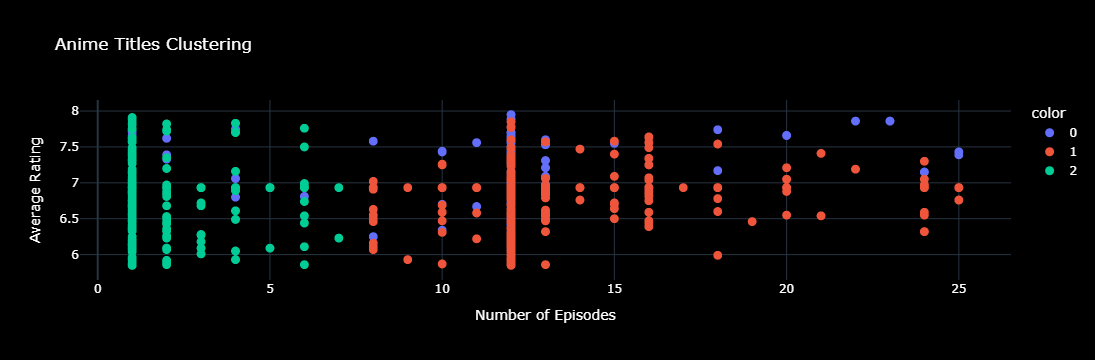

In [229]:
fig = px.scatter(df_cleaned, 
                 x='Episodes', 
                 y='Rating', 
                 color=df_cleaned['Cluster'].astype(str),  
                 title='Anime Titles Clustering',
                 labels={'Episodes': 'Number of Episodes', 'Rating': 'Average Rating', 'Cluster': 'Cluster'},
                 hover_data={'Title': True, 'Episodes': True, 'Rating': True, 'Cluster': True})

fig.update_traces(marker=dict(size=9),
                  selector=dict(mode='markers'))
fig.update_layout(coloraxis_colorbar=dict(
    title="Cluster",
    tickvals=[0, 1, 2],
    ticktext=["Cluster 0", "Cluster 1", "Cluster 2"]),
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white')  
)

fig.show()